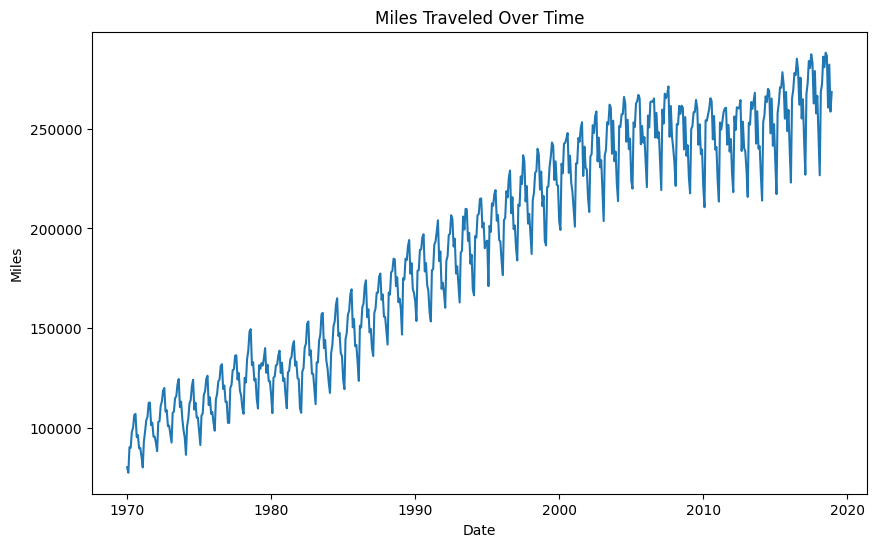

Dickey-Fuller Test:
ADF Statistic: -1.2425483519561509
p-value: 0.6550300653192408
Critical Values:
	1%: -3.441874550188182
	5%: -2.8666239496633246
	10%: -2.569477593105571


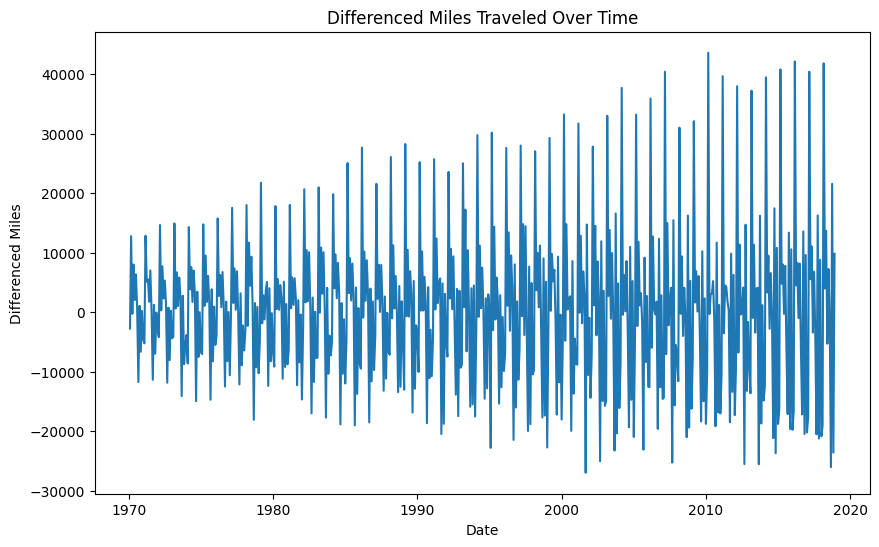

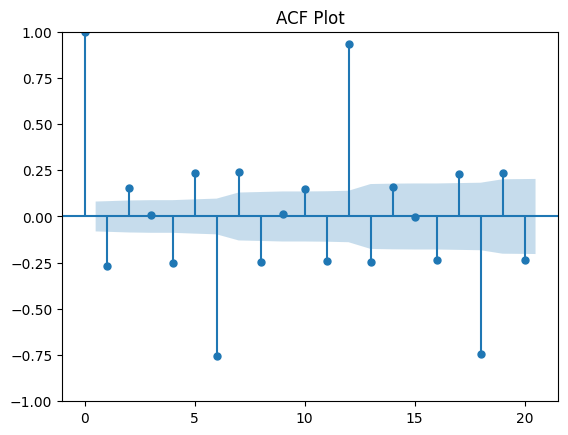

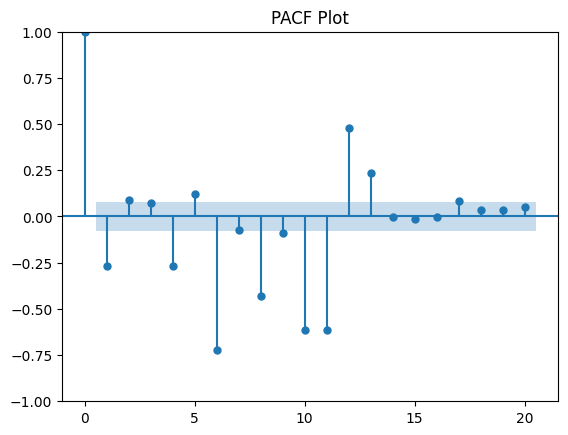

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


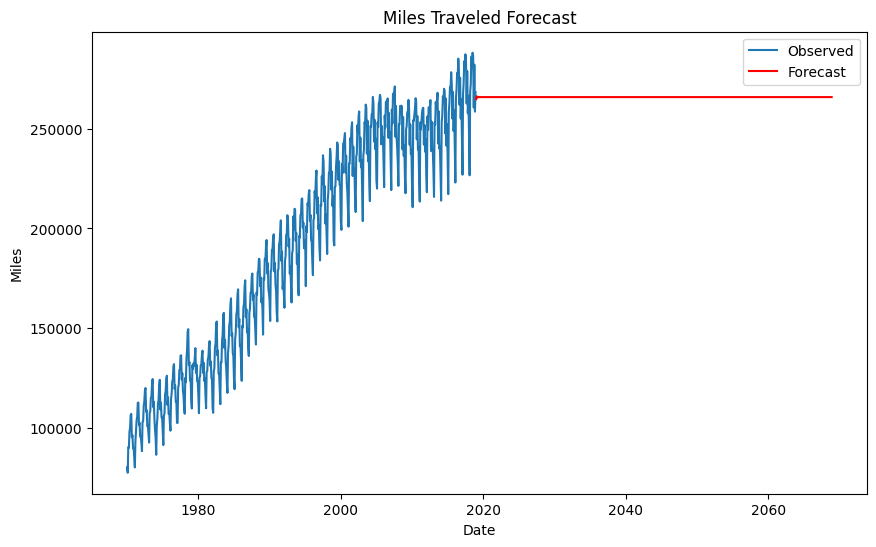

RMSE: 95021.11429548837
MAE: 76549.170155829


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset from CSV
miles = pd.read_csv('miles.csv')

# Rename the second attribute
miles.rename(columns={'TRFVOLUSM227NFWA': 'NoOfMiles'}, inplace=True)

# Convert 'DATE' column to datetime
miles['DATE'] = pd.to_datetime(miles['DATE'])

# Set 'DATE' column as index
miles.set_index('DATE', inplace=True)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(miles)
plt.title('Miles Traveled Over Time')
plt.xlabel('Date')
plt.ylabel('Miles')
plt.show()

# Function to perform Dickey-Fuller test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

# Perform Dickey-Fuller test
print("Dickey-Fuller Test:")
adf_test(miles['NoOfMiles'])

# Make the time series stationary
miles_diff = miles.diff().dropna()

# Plot differenced data
plt.figure(figsize=(10, 6))
plt.plot(miles_diff)
plt.title('Differenced Miles Traveled Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Miles')
plt.show()

# ACF and PACF plots
plot_acf(miles_diff, lags=20)
plt.title('ACF Plot')
plt.show()

plot_pacf(miles_diff, lags=20)
plt.title('PACF Plot')
plt.show()

# Fit the ARIMA model
model = ARIMA(miles, order=(1,1,1))
result = model.fit()

# Forecasting
forecast = result.forecast(steps=len(miles)+12)

# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(miles, label='Observed')
plt.plot(forecast, color='red', label='Forecast')
plt.title('Miles Traveled Forecast')
plt.xlabel('Date')
plt.ylabel('Miles')
plt.legend()
plt.show()

# Evaluate the model
rmse = np.sqrt(mean_squared_error(miles, forecast[:len(miles)]))
mae = mean_absolute_error(miles, forecast[:len(miles)])
print('RMSE:', rmse)
print('MAE:', mae)
